In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4551,5827-MWCZK,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),96.95,5432.2,No
5663,2824-MYYBN,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,3314.15,No
3765,1814-DKOLC,Female,0,No,No,5,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.45,134.75,No
1731,8375-DKEBR,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
768,8728-SKJLR,Male,0,No,No,41,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,74.25,3089.1,No


In [3]:
df.drop("customerID", axis="columns", inplace=True)

In [4]:
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [5]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [7]:
df1 = df[df.TotalCharges != " "]

In [8]:
df1.shape

(7032, 20)

In [9]:
df1[pd.to_numeric(df1.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df1[0:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
type(df1.iloc[18].TotalCharges)

numpy.float64

In [14]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

In [15]:
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

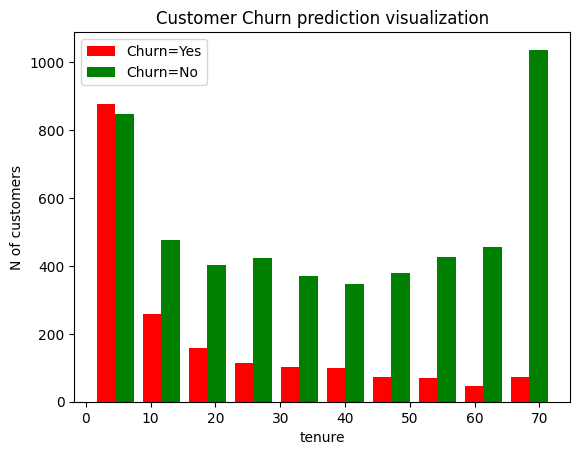

In [16]:
plt.xlabel("tenure")
plt.ylabel("N of customers")
plt.title("Customer Churn prediction visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()

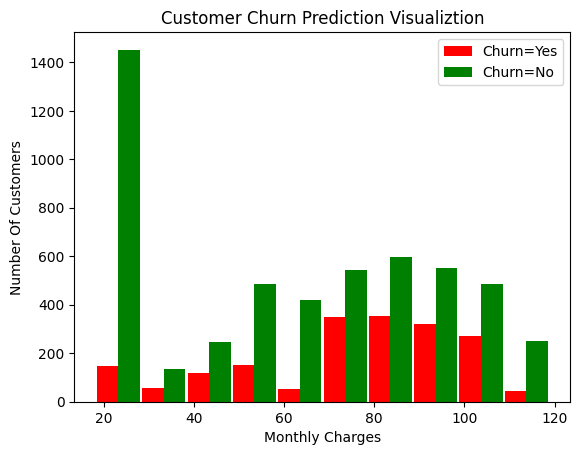

In [17]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [18]:
for col in df1:
    print(df1[col].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [27]:
df2 = pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [30]:
df2['InternetService_No'].replace({True:1,False:0},inplace=True)

In [31]:
df2["InternetService_No"].unique()

array([0, 1], dtype=int64)

In [32]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,0,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,0,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,0,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,0,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,0,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,0,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,0,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,0,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,0,True,False,False,False,False,False,True


In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
df2[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [35]:
df2 = df2.replace({True: 1, False: 0})

In [36]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [37]:
X = df2.drop("Churn", axis="columns")
y = df2["Churn"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [42]:
len(X_train.columns)

26

In [43]:

from tensorflow_addons import losses

C:\Users\miras\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [44]:

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 710us/step - loss: 0.5208 - accuracy: 0.7412
Epoch 2/100
176/176 [==============================] - 0s 710us/step - loss: 0.4316 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 710us/step - loss: 0.4215 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 690us/step - loss: 0.4171 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 0s 690us/step - loss: 0.4147 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 0s 678us/step - loss: 0.4132 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 678us/step - loss: 0.4124 - accuracy: 0.8016
Epoch 8/100
176/176 [==============================] - 0s 684us/step - loss: 0.4116 - accuracy: 0.8043
Epoch 9/100
176/176 [==============================] - 0s 729us/step - loss: 0.4090 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 698us/step - l

In [47]:
################
#Method 1: Undersampling
################

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
print(df_class_0.shape, df_class_1.shape)

(5163, 27) (1869, 27)


In [50]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [51]:
X = df_test_under.drop("Churn", axis=1)
y = df_test_under["Churn"]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [53]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [54]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 622us/step - loss: 0.6304 - accuracy: 0.6508
Epoch 2/100
94/94 [==============================] - 0s 627us/step - loss: 0.5245 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 0s 617us/step - loss: 0.5041 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 719us/step - loss: 0.4951 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 617us/step - loss: 0.4906 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 622us/step - loss: 0.4894 - accuracy: 0.7605
Epoch 7/100
94/94 [==============================] - 0s 643us/step - loss: 0.4855 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 0s 622us/step - loss: 0.4826 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 622us/step - loss: 0.4811 - accuracy: 0.7676
Epoch 10/100
94/94 [==============================] - 0s 622us/step - loss: 0.4785 - accura

In [55]:
################
#Method 2: Oversampling
################

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 661us/step - loss: 0.5391 - accuracy: 0.7370
Epoch 2/100
259/259 [==============================] - 0s 638us/step - loss: 0.4924 - accuracy: 0.7626
Epoch 3/100
259/259 [==============================] - 0s 626us/step - loss: 0.4850 - accuracy: 0.7644
Epoch 4/100
259/259 [==============================] - 0s 619us/step - loss: 0.4809 - accuracy: 0.7666
Epoch 5/100
259/259 [==============================] - 0s 622us/step - loss: 0.4788 - accuracy: 0.7662
Epoch 6/100
259/259 [==============================] - 0s 646us/step - loss: 0.4758 - accuracy: 0.7714
Epoch 7/100
259/259 [==============================] - 0s 715us/step - loss: 0.4721 - accuracy: 0.7723
Epoch 8/100
259/259 [==============================] - 0s 669us/step - loss: 0.4697 - accuracy: 0.7734
Epoch 9/100
259/259 [==============================] - 0s 618us/step - loss: 0.4690 - accuracy: 0.7726
Epoch 10/100
259/259 [==============================] - 0s 646us/step - l

In [60]:
################
#Method 3: SMOTE
################

In [61]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 622us/step - loss: 0.5493 - accuracy: 0.7258
Epoch 2/100
259/259 [==============================] - 0s 626us/step - loss: 0.4719 - accuracy: 0.7753
Epoch 3/100
259/259 [==============================] - 0s 642us/step - loss: 0.4604 - accuracy: 0.7822
Epoch 4/100
259/259 [==============================] - 0s 626us/step - loss: 0.4528 - accuracy: 0.7873
Epoch 5/100
259/259 [==============================] - 0s 642us/step - loss: 0.4477 - accuracy: 0.7877
Epoch 6/100
259/259 [==============================] - 0s 634us/step - loss: 0.4435 - accuracy: 0.7910
Epoch 7/100
259/259 [==============================] - 0s 615us/step - loss: 0.4381 - accuracy: 0.7933
Epoch 8/100
259/259 [==============================] - 0s 615us/step - loss: 0.4352 - accuracy: 0.7965
Epoch 9/100
259/259 [==============================] - 0s 626us/step - loss: 0.4308 - accuracy: 0.7994
Epoch 10/100
259/259 [==============================] - 0s 619us/step - l

In [67]:
################
#Method 4: Use of Ensemble with undersampling
################

In [68]:

df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [69]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [71]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [72]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [73]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [74]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [75]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 633us/step - loss: 0.6328 - accuracy: 0.6739
Epoch 2/100
94/94 [==============================] - 0s 654us/step - loss: 0.5174 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 633us/step - loss: 0.5004 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 643us/step - loss: 0.4950 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 643us/step - loss: 0.4903 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 643us/step - loss: 0.4872 - accuracy: 0.7605
Epoch 7/100
94/94 [==============================] - 0s 751us/step - loss: 0.4861 - accuracy: 0.7639
Epoch 8/100
94/94 [==============================] - 0s 622us/step - loss: 0.4840 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 643us/step - loss: 0.4818 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 633us/step - loss: 0.4795 - accura

In [76]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 643us/step - loss: 0.6167 - accuracy: 0.6749
Epoch 2/100
94/94 [==============================] - 0s 643us/step - loss: 0.5094 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 0s 633us/step - loss: 0.4936 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 643us/step - loss: 0.4832 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 815us/step - loss: 0.4786 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 0s 761us/step - loss: 0.4759 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 676us/step - loss: 0.4734 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 654us/step - loss: 0.4708 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 643us/step - loss: 0.4685 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 622us/step - loss: 0.4666 - accura

In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 632us/step - loss: 0.6583 - accuracy: 0.6068
Epoch 2/100
83/83 [==============================] - 0s 632us/step - loss: 0.5182 - accuracy: 0.7662
Epoch 3/100
83/83 [==============================] - 0s 620us/step - loss: 0.4836 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 620us/step - loss: 0.4768 - accuracy: 0.7765
Epoch 5/100
83/83 [==============================] - 0s 657us/step - loss: 0.4737 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 632us/step - loss: 0.4706 - accuracy: 0.7791
Epoch 7/100
83/83 [==============================] - 0s 645us/step - loss: 0.4680 - accuracy: 0.7829
Epoch 8/100
83/83 [==============================] - 0s 669us/step - loss: 0.4663 - accuracy: 0.7848
Epoch 9/100
83/83 [==============================] - 0s 681us/step - loss: 0.4651 - accuracy: 0.7905
Epoch 10/100
83/83 [==============================] - 0s 681us/step - loss: 0.4621 - accura

In [78]:
len(y_pred1)

1407

In [79]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [80]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

